In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter

In [2]:
sales = pd.read_csv('Bakery sales.csv', parse_dates = ['date'])

In [3]:
sales.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [4]:
sales.tail()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"
234004,511395,2022-09-30,18:56,288913.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


The record starts from 2021-01-02 and end at 2022-09-30.

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     234005 non-null  int64         
 1   date           234005 non-null  datetime64[ns]
 2   time           234005 non-null  object        
 3   ticket_number  234005 non-null  float64       
 4   article        234005 non-null  object        
 5   Quantity       234005 non-null  float64       
 6   unit_price     234005 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 12.5+ MB


In [6]:
sales.describe()

,Unnamed: 0,ticket_number,Quantity
count,234005.000000,234005.000000,234005.000000
mean,255205.035854,219201.258738,1.538377
std,147501.625992,40053.223896,1.289603
min,0.000000,150040.000000,-200.000000
25%,127979.000000,184754.000000,1.000000
50%,254573.000000,218807.000000,1.000000
75%,382911.000000,253927.000000,2.000000
max,511395.000000,288913.000000,200.000000


In [7]:
sales.article.unique()

array(['BAGUETTE', 'PAIN AU CHOCOLAT', 'PAIN', 'TRADITIONAL BAGUETTE',
       'CROISSANT', 'BANETTE', 'BANETTINE', 'SPECIAL BREAD', 'COUPE',
       'SAND JB EMMENTAL', 'KOUIGN AMANN', 'BOULE 200G', 'BOULE 400G',
       'GAL FRANGIPANE 6P', 'CAMPAGNE', 'MOISSON', 'CAFE OU EAU',
       'BRIOCHE', 'CEREAL BAGUETTE', 'SEIGLE', 'COMPLET',
       'DIVERS PATISSERIE', 'GAL FRANGIPANE 4P', 'COOKIE', 'FICELLE',
       'PAIN AUX RAISINS', 'GAL POMME 6P', 'GAL POMME 4P', 'FINANCIER X5',
       'VIK BREAD', 'DIVERS VIENNOISERIE', 'GACHE', 'SANDWICH COMPLET',
       'PAIN BANETTE', 'GRAND FAR BRETON', 'QUIM BREAD',
       'SPECIAL BREAD KG', 'GD KOUIGN AMANN', 'BOULE POLKA',
       'DEMI BAGUETTE', 'CHAUSSON AUX POMMES', 'BAGUETTE GRAINE',
       'DIVERS CONFISERIE', 'SUCETTE', 'DIVERS BOULANGERIE',
       'BOISSON 33CL', 'PATES', 'FORMULE SANDWICH', 'DIVERS SANDWICHS',
       'CROISSANT AMANDES', 'PAIN CHOCO AMANDES', 'SACHET VIENNOISERIE',
       'NANTAIS', 'CHOCOLAT', 'PAIN S/SEL', 'FONDANT CHOC

In [8]:
sales[sales['article'] == '.']

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
15360,33726,2021-03-04,12:32,159219.0,.,2.0,"0,00 €"
19904,43541,2021-03-18,12:59,161853.0,.,1.0,"0,00 €"
24959,54650,2021-04-04,09:53,164878.0,.,1.0,"0,00 €"
33569,73667,2021-04-27,16:48,170079.0,.,1.0,"0,00 €"
61792,135091,2021-07-10,13:25,186662.0,.,2.0,"0,00 €"


## Data Cleaning

In [9]:
sales = sales[['date','time','article', 'Quantity', 'unit_price']]

Removed the columns "Unnamed: 0" and "ticket_number".

In [10]:
drop_index = sales[sales['article'] == '.'].index

In [11]:
sales.drop(drop_index, inplace=True)

In [12]:
sales[sales['article'] == '.']

,date,time,article,Quantity,unit_price


In [13]:
sales['unit_price'] = sales['unit_price'].str.replace(',','.')
sales['unit_price'] = sales['unit_price'].str.replace(' €','')
sales['unit_price'] = pd.to_numeric(sales['unit_price'])

In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234000 entries, 0 to 234004
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        234000 non-null  datetime64[ns]
 1   time        234000 non-null  object        
 2   article     234000 non-null  object        
 3   Quantity    234000 non-null  float64       
 4   unit_price  234000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 10.7+ MB


In [15]:
zeroprice = sales[sales.unit_price == 0]

In [16]:
zeroprice.groupby('article').sum()

,Quantity,unit_price
article,,
ARTICLE 295,1.0,0.0
DIVERS BOISSONS,1.0,0.0
DIVERS BOULANGERIE,2.0,0.0
DIVERS CONFISERIE,3.0,0.0
DIVERS PATISSERIE,7.0,0.0
DIVERS SANDWICHS,0.0,0.0
DIVERS VIENNOISERIE,2.0,0.0
GD FAR BRETON,4.0,0.0
"PLATPREPARE6,50",1.0,0.0


No null data.

In [17]:
sales['total_price'] = sales['Quantity'] * sales['unit_price']

In [18]:
sales['year'] = sales['date'].map(lambda x: x.year)
sales['month'] = sales['date'].map(lambda x: x.month)
sales['hour'] = sales['time'].map(lambda x: datetime.strptime(x, "%H:%M").hour)

In [19]:
sales.head()

,date,time,article,Quantity,unit_price,total_price,year,month,hour
0,2021-01-02,08:38,BAGUETTE,1.0,0.90,0.90,2021,1,8
1,2021-01-02,08:38,PAIN AU CHOCOLAT,3.0,1.20,3.60,2021,1,8
2,2021-01-02,09:14,PAIN AU CHOCOLAT,2.0,1.20,2.40,2021,1,9
3,2021-01-02,09:14,PAIN,1.0,1.15,1.15,2021,1,9
4,2021-01-02,09:25,TRADITIONAL BAGUETTE,5.0,1.20,6.00,2021,1,9


In [20]:
sales.describe()

,Quantity,unit_price,total_price,year,month,hour
count,234000.000000,234000.000000,234000.000000,234000.000000,234000.000000,234000.000000
mean,1.538380,1.662230,2.387354,2021.438397,6.240906,11.072009
std,1.289615,1.722721,2.635046,0.496192,2.800779,2.774396
min,-200.000000,0.000000,-200.000000,2021.000000,1.000000,7.000000
25%,1.000000,1.100000,1.200000,2021.000000,4.000000,9.000000
50%,1.000000,1.200000,1.600000,2021.000000,7.000000,11.000000
75%,2.000000,1.500000,2.600000,2022.000000,8.000000,12.000000
max,200.000000,60.000000,200.000000,2022.000000,12.000000,20.000000


Negative values in Quantity seems like purchase cancellation or refund.

## EDA

In [21]:
itemed = sales.groupby("article").sum()

We do not use count() because it includes negative quantity values

In [22]:
top_ten = itemed.sort_values(by = 'Quantity', ascending = False).head(10)

In [23]:
top_ten

,Quantity,unit_price,total_price,year,month,hour
article,,,,,,
TRADITIONAL BAGUETTE,117463.0,83400.15,144756.05,136829759,427006,769575
CROISSANT,29654.0,13030.55,33579.50,23262885,72603,107717
PAIN AU CHOCOLAT,25236.0,13036.20,31100.45,21382977,66223,101044
COUPE,23505.0,3070.50,3525.75,41378581,127959,232807
BANETTE,22732.0,16343.20,24555.15,30584285,94539,164419
BAGUETTE,22053.0,14208.00,20481.40,30911711,94406,161242
CEREAL BAGUETTE,7427.0,6328.00,9473.40,10028072,30678,57228
SPECIAL BREAD,5456.0,12776.30,13419.70,10501354,31827,58354
FORMULE SANDWICH,5181.0,28179.00,34710.50,8494218,24823,47885


In [24]:
top_ten.index

Index(['TRADITIONAL BAGUETTE', 'CROISSANT', 'PAIN AU CHOCOLAT', 'COUPE',
       'BANETTE', 'BAGUETTE', 'CEREAL BAGUETTE', 'SPECIAL BREAD',
       'FORMULE SANDWICH', 'TARTELETTE'],
      dtype='object', name='article')

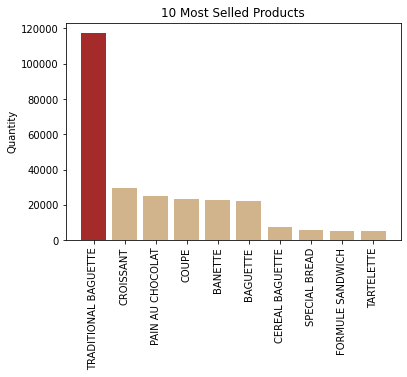

In [25]:
plt.subplots()
colors = ['tan' if (b < top_ten.Quantity.max()) else 'brown' for b in top_ten.Quantity]
plt.bar(top_ten.index, top_ten.Quantity, color = colors)
plt.title("10 Most Selled Products")
plt.ylabel("Quantity")
plt.xticks(rotation = 90)
plt.show()

From 2021-01-02 to 2022-09-30, the most selled item is TRADITIONAL BAGUETTE. The difference between the sales of other popular items, TRADITIONAL BAGUETTE is outstandingly popular.

#### Hourly Sales

In [26]:
sales_by_hour = sales.groupby('hour')

In [27]:
sales_by_hour.sum().Quantity/len(sales['date'].unique())

hour
7      22.386667
8      84.020000
9      95.740000
10    107.493333
11    115.326667
12     87.090000
13     14.583333
14      0.430000
15      0.233333
16     20.655000
17     26.856667
18     22.678333
19      2.463333
20      0.011667
Name: Quantity, dtype: float64

This is sum of the number of sales on hourly basis from Jan 2021 to Sep 2022 - 600 days (excluding closed days).

In [28]:
sales[sales.hour == 20]

,date,time,article,Quantity,unit_price,total_price,year,month,hour
116534,2021-11-02,20:01,TRADITIONAL BAGUETTE,2.0,1.20,2.40,2021,11,20
116880,2021-11-03,20:01,COUPE,1.0,0.15,0.15,2021,11,20
116881,2021-11-03,20:01,MOISSON,1.0,2.00,2.00,2021,11,20
116882,2021-11-03,20:01,TRADITIONAL BAGUETTE,1.0,1.20,1.20,2021,11,20
117213,2021-11-04,20:01,TRADITIONAL BAGUETTE,1.0,1.20,1.20,2021,11,20
117214,2021-11-04,20:01,TRADITIONAL BAGUETTE,-1.0,1.20,-1.20,2021,11,20
118498,2021-11-08,20:00,ARTICLE 295,1.0,0.00,0.00,2021,11,20
118499,2021-11-08,20:00,TRADITIONAL BAGUETTE,1.0,1.20,1.20,2021,11,20


To get some sense of daily sales based on time, I divided the sum of quantity grouped by hours by 600 days.

Based on the chart, it seems that people buy breads the most in the morning.

hour 7 means from 7:00 to 7:59, approximately 22 items were sold on average.

We will not consider hour 20 since it seems like 20 is the closing time. A few purchases made in 20 seems like some customers came in just before closing and bought products.

The reason why I am using sum() instead of count() is because of the negative values in Quantity. We are focusing on the number of products sold rather than the number of transactions. count() includes cancelled items while sum() calculates the real total number of products sold.

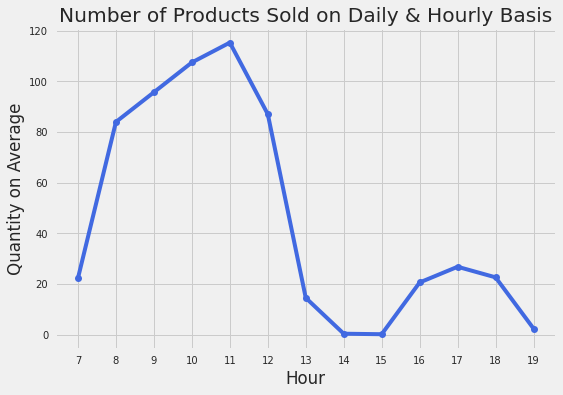

In [53]:
plt.style.use('fivethirtyeight')
plt.plot((sales_by_hour.sum().Quantity/len(sales['date'].unique()))[:-1], marker = 'o', color = 'royalblue')
plt.xticks(sales_by_hour.sum().index[:-1])
plt.title('Number of Products Sold on Daily & Hourly Basis')
plt.xlabel('Hour')
plt.ylabel('Quantity on Average')
plt.show()

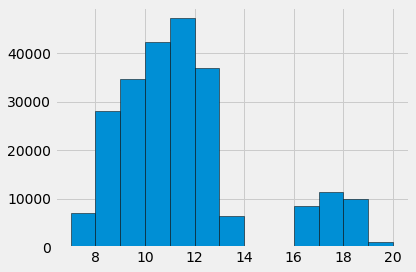

In [30]:
plt.style.use('fivethirtyeight')
bins = [7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.hist(sales.hour, bins = bins, edgecolor='black')
plt.tight_layout()

## Compare Year 2021 and 2022

In [31]:
sales_2021 = sales[sales['year'] == 2021]

In [32]:
sales_2022 = sales[sales['year'] == 2022]

In [33]:
sales_2021.head()

,date,time,article,Quantity,unit_price,total_price,year,month,hour
0,2021-01-02,08:38,BAGUETTE,1.0,0.90,0.90,2021,1,8
1,2021-01-02,08:38,PAIN AU CHOCOLAT,3.0,1.20,3.60,2021,1,8
2,2021-01-02,09:14,PAIN AU CHOCOLAT,2.0,1.20,2.40,2021,1,9
3,2021-01-02,09:14,PAIN,1.0,1.15,1.15,2021,1,9
4,2021-01-02,09:25,TRADITIONAL BAGUETTE,5.0,1.20,6.00,2021,1,9


In [34]:
sales_2022.head()

,date,time,article,Quantity,unit_price,total_price,year,month,hour
131420,2022-01-02,07:39,BANETTE,5.0,1.05,5.25,2022,1,7
131421,2022-01-02,07:39,CEREAL BAGUETTE,3.0,1.25,3.75,2022,1,7
131422,2022-01-02,07:44,BANETTE,1.0,1.05,1.05,2022,1,7
131423,2022-01-02,07:44,PAIN AU CHOCOLAT,2.0,1.20,2.40,2022,1,7
131424,2022-01-02,07:45,BAGUETTE,1.0,0.90,0.90,2022,1,7


## 2021

In [35]:
sales_2021.groupby('article').sum().Quantity.sort_values(ascending = False)[:5]

article
TRADITIONAL BAGUETTE    65619.0
CROISSANT               16398.0
PAIN AU CHOCOLAT        13829.0
COUPE                   13666.0
BANETTE                 13003.0
Name: Quantity, dtype: float64

In [36]:
sales_2021.groupby('month').sum().Quantity

month
1      9476.0
2     11834.0
3     13791.0
4     16552.0
5     19469.0
6     16369.0
7     28335.0
8     33328.0
9     15276.0
10    14971.0
11    11773.0
12    12138.0
Name: Quantity, dtype: float64

## 2022

In [37]:
sales_2022.groupby('article').sum().Quantity.sort_values(ascending = False)[:5]

article
TRADITIONAL BAGUETTE    51844.0
CROISSANT               13256.0
PAIN AU CHOCOLAT        11407.0
COUPE                    9839.0
BANETTE                  9729.0
Name: Quantity, dtype: float64

In [38]:
sales_2022.groupby('month').sum().Quantity

month
1     8952.0
2    11531.0
3    11789.0
4    14925.0
5    17643.0
6    15659.0
7    29192.0
8    33545.0
9    13433.0
Name: Quantity, dtype: float64

### Compare 2021 and 2022

In [39]:
sales_2021.total_price.sum()/12

25371.693333333333

In [40]:
year = [2021,2022]
avg_monthly_sales = [sales_2021.total_price.sum()/12, sales_2022.total_price.sum()/9]

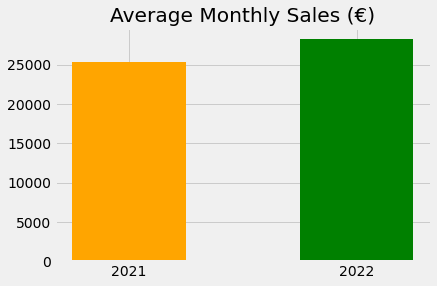

In [41]:
fig, ax = plt.subplots()
colors = ['orange', 'green']
ax.bar(year, avg_monthly_sales, width = 0.5, color = colors)
ax.set_xticks(year)
ax.set_title("Average Monthly Sales (€)")
plt.show()

In [42]:
type(sales_2022.groupby('month').sum().Quantity)

pandas.core.series.Series

In [43]:
monthly21 = sales_2021.groupby('month').sum().Quantity

In [44]:
monthly22 = sales_2022.groupby('month').sum().Quantity

In [45]:
monthly22[10] = 0
monthly22[11] = 0
monthly22[12] = 0

In [46]:
monthly22

month
1      8952.0
2     11531.0
3     11789.0
4     14925.0
5     17643.0
6     15659.0
7     29192.0
8     33545.0
9     13433.0
10        0.0
11        0.0
12        0.0
Name: Quantity, dtype: float64

In [47]:
total21 = sales_2021.groupby('month').sum().total_price
total22 = sales_2022.groupby('month').sum().total_price
total22[10] = 0
total22[11] = 0
total22[12] = 0

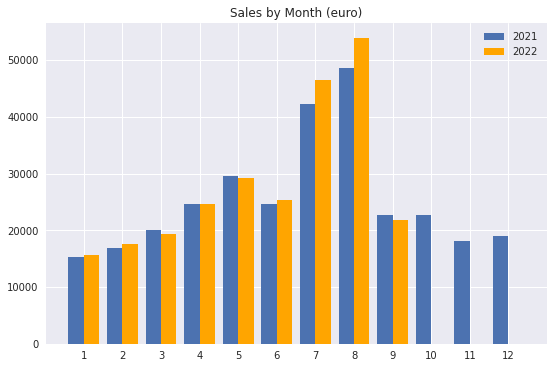

In [48]:
months = np.arange(1,13)
plt.style.use('seaborn')
plt.bar(months-0.2, total21, width = 0.4, label = "2021")
plt.bar(months+0.2, total22, color = 'orange', width = 0.4, label = "2022")
plt.xticks(months)
plt.title("Sales by Month (euro)")
plt.legend()
plt.show()

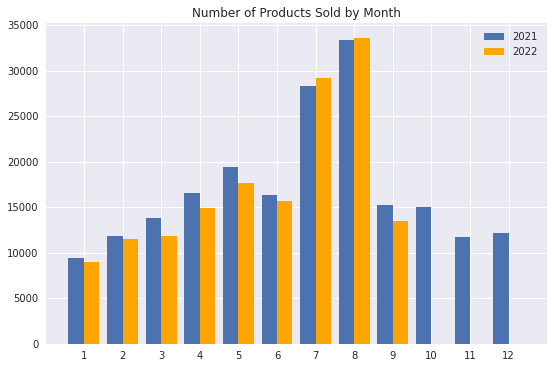

In [49]:
months = np.arange(1,13)
plt.bar(months-0.2, monthly21, width = 0.4, label = "2021")
plt.bar(months+0.2, monthly22, color = 'orange', width = 0.4, label = "2022")
plt.xticks(months)
plt.title("Number of Products Sold by Month")
plt.legend()
plt.show()